<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Real-Plus/Minus" data-toc-modified-id="Real-Plus/Minus-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Real Plus/Minus</a></span></li></ul></div>

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import zscore

from regression_helper import multiple_regression_big, multiple_regression_big_with_penalty

## Real Plus/Minus

In [2]:
stints = pd.read_csv('nba_stints_2015_binary.csv.gz')
stints.head()

,net_rtg,net_poss,HCA,A.J. Price,Aaron Brooks,Aaron Gordon,Adreian Payne,Al Horford,Al Jefferson,Al-Farouq Aminu,...,Will Barton,Will Bynum,Will Cherry,Willie Green,Wilson Chandler,Xavier Henry,Zach LaVine,Zach Randolph,Zaza Pachulia,Zoran Dragic
0,87.5,8,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-40.0,20,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,120.0,5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,100.0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
players = list(stints.columns[3:])
ind_vars = list(stints.columns[2:])
apm = multiple_regression_big('net_rtg', ind_vars, stints, weights='net_poss')
apm.head(10)

A.J. Price         -7.991129
Aaron Brooks       -1.756187
Aaron Gordon       -7.374247
Adreian Payne     -10.779553
Al Horford          0.181153
Al Jefferson       -7.940346
Al-Farouq Aminu    -2.012078
Alan Anderson      -1.572974
Alec Burks         -7.140850
Alex Kirk         -24.311230
dtype: float64

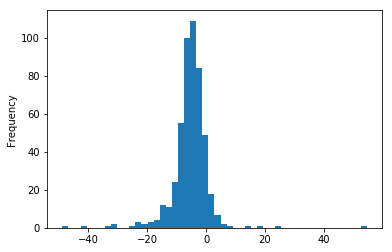

In [5]:
apm.plot.hist(bins=50);

In [6]:
apm_HCA = apm['HCA']
print("Home Court Advantage for Net Rating: {:.2f}".format(apm_HCA))
print()
print("Top 20 by APM\n" + 40*"=")
print(apm[players].sort_values(ascending=False)[:20].to_string())
print()
print("Bottom 20 by APM\n" + 40*"=")
print(apm[players].sort_values(ascending=True)[:20].to_string())

Home Court Advantage for Net Rating: 1.16

Top 20 by APM
Jerrelle Benimon    54.572027
Malcolm Lee         23.899380
Eric Moreland       19.364534
Sim Bhullar         13.482017
David Stockton       8.342210
Lucas Nogueira       6.073172
Toure' Murry         5.806591
Sean Kilpatrick      4.815747
Paul Millsap         4.618496
Quincy Miller        4.075336
Cory Jefferson       3.922756
Russ Smith           3.896168
Stephen Curry        3.804560
Xavier Henry         3.728450
James Harden         2.499012
Anthony Davis        2.354493
Derrick Rose         2.079204
C.J. Wilcox          2.069485
Pero Antic           2.056680
Carmelo Anthony      1.989486

Bottom 20 by APM
Julius Randle         -48.888431
Bruno Caboclo         -41.208826
David Wear            -33.999005
Mike Malone           -31.686993
Kalin Lucas           -30.696550
Alex Kirk             -24.311230
Patrick Christopher   -23.057703
Glen Rice Jr.         -22.760322
Andrei Kirilenko      -22.361349
Dahntay Jones         -21.46

In [11]:
rapm = multiple_regression_big_with_penalty('net_rtg', ind_vars, stints, weights='net_poss', penalty=1000.)
rapm.head(10)

A.J. Price        -2.208826
Aaron Brooks       1.373228
Aaron Gordon      -1.665784
Adreian Payne     -3.259032
Al Horford         0.756031
Al Jefferson      -0.794095
Al-Farouq Aminu    2.115859
Alan Anderson      2.050260
Alec Burks        -1.633426
Alex Kirk         -0.990632
dtype: float64

Home Court Advantage for Net Rating: 1.17

Top 20 by RAPM
Stephen Curry        5.987077
Anthony Davis        5.512299
Kyle Korver          5.426923
James Harden         5.290294
Khris Middleton      5.036466
Draymond Green       4.909569
LeBron James         4.895868
Kawhi Leonard        4.727226
Cory Jefferson       4.683430
Chris Paul           4.526599
Kelly Olynyk         4.360387
Zach Randolph        4.324951
Luol Deng            4.048028
Derrick Rose         4.036020
DeMarcus Cousins     3.993643
Carmelo Anthony      3.956649
LaMarcus Aldridge    3.891045
George Hill          3.876510
Gordon Hayward       3.843642
Ricky Rubio          3.765408

Bottom 20 by RAPM
Brandon Rush        -7.205629
Johnny O'Bryant     -5.463691
Landry Fields       -5.299056
Perry Jones         -4.819680
Samuel Dalembert    -4.626875
Martell Webster     -4.611679
Archie Goodwin      -4.515100
Joffrey Lauvergne   -4.418567
Malcolm Thomas      -4.405789
Dahntay Jones       -4.308704
Chris Kaman         -4.

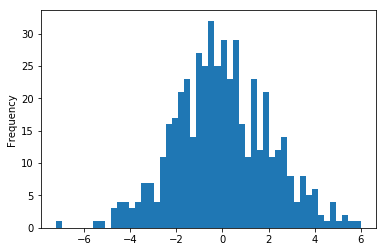

In [12]:
rapm.plot.hist(bins=50)

rapm_HCA = rapm['HCA']
print("Home Court Advantage for Net Rating: {:.2f}".format(rapm_HCA))
print()
print("Top 20 by RAPM\n" + 40*"=")
print(rapm[players].sort_values(ascending=False)[:20].to_string())
print()
print("Bottom 20 by RAPM\n" + 40*"=")
print(rapm[players].sort_values(ascending=True)[:20].to_string())

In [13]:
stints.head()

,net_rtg,net_poss,HCA,A.J. Price,Aaron Brooks,Aaron Gordon,Adreian Payne,Al Horford,Al Jefferson,Al-Farouq Aminu,...,Will Barton,Will Bynum,Will Cherry,Willie Green,Wilson Chandler,Xavier Henry,Zach LaVine,Zach Randolph,Zaza Pachulia,Zoran Dragic
0,87.5,8,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-40.0,20,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,120.0,5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,100.0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
players = list(stints.columns[3:])

In [170]:
from sklearn.linear_model import LogisticRegression, LinearRegression
import tqdm
from sklearn.metrics import recall_score, precision_score

In [62]:
from scipy.sparse import csc_matrix

def _sdf_to_csc(sdf, dtype=np.float64):
    cols, rows, datas = [], [], []
    for col, name in enumerate(sdf):
        s = sdf[name]
        row = s.sp_index.to_int_index().indices
        cols.append(np.repeat(col, len(row)))
        rows.append(row)
        datas.append(s.sp_values.astype(dtype, copy=False))

    cols = np.concatenate(cols)
    rows = np.concatenate(rows)
    datas = np.concatenate(datas)
    return csc_matrix((datas, (rows, cols)), shape=sdf.shape)


In [63]:
from scipy.sparse import hstack

In [180]:
c = 1e6
model_logit = LogisticRegression(C=c, fit_intercept=True)
model = LinearRegression() # LogisticRegression(C=c, fit_intercept=True)
w = stints['net_poss']

tmp_stints = stints.abs().to_sparse(fill_value=0)
X_full = _sdf_to_csc(tmp_stints)
scores = []
for i in tqdm.tqdm_notebook(range(len(players))):
    player_i = players[i]
    j = i + 3
    y = np.asarray(X_full[:, j].todense()).ravel()
    X = hstack([X_full[:, :j], X_full[:, j+1:]])
    model.fit(X, y, sample_weight=w)
    model_logit.fit(X, y, sample_weight=w)
#     s = model.score(X, y, sample_weight=w)
    ss_res = np.sum(w * (y - model.predict(X))**2) / w.sum()
    ss_tot = np.sum(w * (y - y.mean())**2) / w.sum()
    r_sq = 1 - ss_res / ss_tot
    
    y_pred = model_logit.predict(X)
    recall = recall_score(y, y_pred, sample_weight=w)
    prec = precision_score(y, y_pred, sample_weight=w)
    player_poss = (y * w).sum()
    scores.append({'player': player_i, 'r_sq': r_sq, 'recall': recall, 'prec': prec, 'poss': player_poss})

HBox(children=(IntProgress(value=0, max=493), HTML(value='')))

In [181]:
scores = pd.DataFrame(scores).set_index('player')

In [187]:
scores.sort_values('prec', ascending=True)

,poss,prec,r_sq,recall
player,,,,
Rudy Gobert,8060.0,0.989772,0.884365,0.996526
Cory Jefferson,2080.0,0.992809,0.610673,0.995673
Quincy Pondexter,7287.0,0.993259,0.802582,0.990806
Jon Leuer,3197.0,0.993456,0.696407,0.997185
Brandon Knight,8096.0,0.994451,0.835132,0.996171
Rasual Butler,5832.0,0.994532,0.800489,0.997942
Ersan Ilyasova,5698.0,0.994572,0.777296,0.996841
Jerryd Bayless,7043.0,0.995032,0.806340,0.995314
A.J. Price,1207.0,0.995054,0.496686,1.000000


In [217]:
c = 1e6
model_logit = LogisticRegression(C=c, fit_intercept=True)
model = LinearRegression() # LogisticRegression(C=c, fit_intercept=True)
w = stints['net_poss']

tmp_stints = stints.values
nrows = stints.shape[0]
for row in range(nrows):
    np.random.shuffle(tmp_stints[row, 3:])
    

In [214]:
tmp_stints = pd.DataFrame(tmp_stints, columns=stints.columns)
tmp_stints = tmp_stints.abs().to_sparse(fill_value=0)
X_full = _sdf_to_csc(tmp_stints)
scores = []
for i in tqdm.tqdm_notebook(range(len(players))):
    player_i = players[i]
    j = i + 3
    y = np.asarray(X_full[:, j].todense()).ravel()
    X = hstack([X_full[:, :j], X_full[:, j+1:]])
    model.fit(X, y, sample_weight=w)
    model_logit.fit(X, y, sample_weight=w)
#     s = model.score(X, y, sample_weight=w)
    ss_res = np.sum(w * (y - model.predict(X))**2) / w.sum()
    ss_tot = np.sum(w * (y - y.mean())**2) / w.sum()
    r_sq = 1 - ss_res / ss_tot
    
    y_pred = model_logit.predict(X)
    recall = recall_score(y, y_pred, sample_weight=w)
    prec = precision_score(y, y_pred, sample_weight=w)
    player_poss = (y * w).sum()
    scores.append({'player': player_i, 'r_sq': r_sq, 'recall': recall, 'prec': prec, 'poss': player_poss})

HBox(children=(IntProgress(value=0, max=493), HTML(value='')))

In [215]:
scores = pd.DataFrame(scores).set_index('player')
scores.sort_values('prec', ascending=True)

,poss,prec,r_sq,recall
player,,,,
John Salmons,4711.0,0.976195,0.683611,0.992358
Bryce Cotton,5189.0,0.976200,0.702346,0.988052
Ronnie Price,4589.0,0.976644,0.674607,0.984092
Andrew Nicholson,5179.0,0.976660,0.704815,0.993821
Jeremy Lamb,4719.0,0.976691,0.684511,0.994490
Dirk Nowitzki,4825.0,0.976943,0.688816,0.992332
Evan Turner,4622.0,0.977641,0.679295,0.993293
Trey Burke,5003.0,0.977782,0.692986,0.985209
Otto Porter,4726.0,0.977796,0.682217,0.987727


In [126]:
df = pd.read_csv('nba_stints_2015_full.csv.gz')
df.head()

,away,away_ortg,away_poss,away_pts,away_unit,home,home_ortg,home_poss,home_pts,home_unit,net_poss,home_netpts,home_netrtg
0,Warriors,100.0,4,4,"['Stephen Curry', 'Klay Thompson', 'Andre Iguo...",Lakers,275.0,4,11,"['Ronnie Price', 'Wayne Ellington', 'Wesley Jo...",8,7,87.5
1,Kings,NaN,0,0,"['Ray McCallum', 'Ben McLemore', 'Nik Stauskas...",Nets,0.0,1,0,"['Jarrett Jack', 'Alan Anderson', 'Joe Johnson...",1,0,0.0
2,Warriors,170.0,10,17,"['Stephen Curry', 'Klay Thompson', 'Harrison B...",Lakers,90.0,10,9,"['Ronnie Price', 'Wayne Ellington', 'Wesley Jo...",20,-8,-40.0
3,Warriors,0.0,2,0,"['Stephen Curry', 'Klay Thompson', 'Harrison B...",Lakers,200.0,3,6,"['Ronnie Price', 'Wayne Ellington', 'Wesley Jo...",5,6,120.0
4,Warriors,100.0,1,1,"['Stephen Curry', 'Klay Thompson', 'Harrison B...",Lakers,NaN,0,2,"['Ronnie Price', 'Wayne Ellington', 'Wesley Jo...",1,1,100.0


In [102]:
cp3_away_mask = df['away_unit'].str.contains("Chris Paul")
cp3_home_mask = df['home_unit'].str.contains("Chris Paul")

In [105]:
cp3_lineups = set(df.loc[cp3_away_mask, 'away_unit'].unique()).union(df.loc[cp3_home_mask, 'home_unit'].unique())

In [106]:
cp3_lineups

{"['Chris Paul', 'Austin Rivers', 'Dahntay Jones', 'Blake Griffin', 'DeAndre Jordan']",
 "['Chris Paul', 'Austin Rivers', 'Dahntay Jones', 'Blake Griffin', 'Spencer Hawes']",
 "['Chris Paul', 'Austin Rivers', 'Dahntay Jones', 'DeAndre Jordan', 'Spencer Hawes']",
 "['Chris Paul', 'Austin Rivers', 'Dahntay Jones', 'Glen Davis', 'DeAndre Jordan']",
 "['Chris Paul', 'Austin Rivers', 'Dahntay Jones', 'Hedo Turkoglu', 'Blake Griffin']",
 "['Chris Paul', 'Austin Rivers', 'Dahntay Jones', 'Jordan Hamilton', 'DeAndre Jordan']",
 "['Chris Paul', 'Austin Rivers', 'Dahntay Jones', 'Matt Barnes', 'Blake Griffin']",
 "['Chris Paul', 'Austin Rivers', 'Dahntay Jones', 'Matt Barnes', 'DeAndre Jordan']",
 "['Chris Paul', 'Austin Rivers', 'Dahntay Jones', 'Matt Barnes', 'Glen Davis']",
 "['Chris Paul', 'Austin Rivers', 'Dahntay Jones', 'Matt Barnes', 'Spencer Hawes']",
 "['Chris Paul', 'Austin Rivers', 'Hedo Turkoglu', 'Blake Griffin', 'DeAndre Jordan']",
 "['Chris Paul', 'Austin Rivers', 'Hedo Turkoglu'

In [120]:
model = LogisticRegression(C=c, fit_intercept=True)

i = players.index("Manu Ginobili")
player_i = players[i]
j = i + 3
y = np.asarray(X_full[:, j].todense()).ravel()
X = hstack([X_full[:, :j], X_full[:, j+1:]])
model.fit(X, y, sample_weight=w)
y_pred = model.predict(X)
s = model.score(X, y, sample_weight=w)
np.abs((y - y_pred)).sum(), s

(17.0, 0.99984198819368197)

In [134]:
clippers_mask = (df['away'] == 'Clippers') | (df['home'] == 'Clippers')

clippers_df = df.loc[clippers_mask]

dj_away_mask = clippers_df['away_unit'].str.contains("DeAndre Jordan")
dj_home_mask = clippers_df['home_unit'].str.contains("DeAndre Jordan")
dj_mask = dj_away_mask | dj_home_mask

hawes_away_mask = clippers_df['away_unit'].str.contains("Spencer Hawes")
hawes_home_mask = clippers_df['home_unit'].str.contains("Spencer Hawes")
hawes_mask = hawes_away_mask | hawes_home_mask

In [135]:
(clippers_df.loc[dj_mask, 'away_poss'].sum() + clippers_df.loc[dj_mask, 'home_poss'].sum()) / \
    (clippers_df['away_poss'].sum() + clippers_df['home_poss'].sum())

0.711369622475856

In [143]:
clippers_df.loc[hawes_mask, ['away_poss', 'home_poss']].sum().sum() / \
    clippers_df[['away_poss', 'home_poss']].sum().sum()

0.2839113257243196

In [142]:
clippers_df.loc[(hawes_mask & dj_mask), ['away_poss', 'home_poss']].sum().sum() / clippers_df[['away_poss', 'home_poss']].sum().sum()

0.11144644424934153

In [144]:
clippers_df.loc[(hawes_mask & dj_mask), ['away_poss', 'home_poss']].sum().sum() / clippers_df.loc[hawes_mask, ['away_poss', 'home_poss']].sum().sum()

0.39253962118283725

In [146]:
grizz_mask = (df['away'] == 'Grizzlies') | (df['home'] == 'Grizzlies')

grizz_df = df.loc[grizz_mask]

gasol_away_mask = grizz_df['away_unit'].str.contains("Marc Gasol")
gasol_home_mask = grizz_df['home_unit'].str.contains("Marc Gasol")
gasol_mask = gasol_away_mask | gasol_home_mask

koufos_away_mask = grizz_df['away_unit'].str.contains("Kosta Koufos")
koufos_home_mask = grizz_df['home_unit'].str.contains("Kosta Koufos")
koufos_mask = koufos_away_mask | koufos_home_mask

In [148]:
(grizz_df.loc[gasol_mask, ['away_poss', 'home_poss']].sum().sum()) / \
    (grizz_df[['away_poss', 'home_poss']].sum().sum())

0.68698383156915199

In [149]:
(grizz_df.loc[koufos_mask, ['away_poss', 'home_poss']].sum().sum()) / \
    (grizz_df[['away_poss', 'home_poss']].sum().sum())

0.32505525183203443

In [150]:
grizz_df.loc[(koufos_mask & gasol_mask), ['away_poss', 'home_poss']].sum().sum() / \
    grizz_df[['away_poss', 'home_poss']].sum().sum()

0.059439339304408513

In [151]:
grizz_df.loc[(koufos_mask & gasol_mask), ['away_poss', 'home_poss']].sum().sum() / \
    grizz_df.loc[koufos_mask, ['away_poss', 'home_poss']].sum().sum()

0.18285918769010556

In [152]:
grizz_df.loc[(koufos_mask & gasol_mask), ['away_poss', 'home_poss']].sum().sum() / \
    grizz_df.loc[gasol_mask, ['away_poss', 'home_poss']].sum().sum()

0.086522180833051132